# Chapter 10

## Fashion Image Classifier

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [17]:
# Creating validation set (taking 5000 first entries out of 60K), and dividing by 255 to normalize on a scale from 0 to 1
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000]/255.0, y_train_full[5000:]/255.0

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Keras MLP

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 101us/sample - loss: 0.0146 - acc: 0.9989 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 2/30
55000/55000 [==============================] - 4s 78us/sample - loss: 7.3149e-04 - acc: 1.0000 - val_loss: 4.8066e-04 - val_acc: 1.0000
Epoch 3/30
55000/55000 [==============================] - 4s 74us/sample - loss: 4.0462e-04 - acc: 1.0000 - val_loss: 3.1143e-04 - val_acc: 1.0000
Epoch 4/30
55000/55000 [==============================] - 4s 75us/sample - loss: 2.7768e-04 - acc: 1.0000 - val_loss: 2.2922e-04 - val_acc: 1.0000
Epoch 5/30
55000/55000 [==============================] - 4s 76us/sample - loss: 2.1037e-04 - acc: 1.0000 - val_loss: 1.8088e-04 - val_acc: 1.0000
Epoch 6/30
55000/55000 [==============================] - 4s 78us/sample - loss: 1.6882e-04 - acc: 1.0000 - val_loss: 1.4914e-04 - val_acc: 1.0000
Epoch 7/30
55000/55000 [==============================] - 4s 76us/sample - l

In [39]:
import pandas as pd

In [49]:
successrate = pd.DataFrame(history.history)

In [50]:
successrate

,loss,acc,val_loss,val_acc
0,0.014626,0.998891,0.001018,1.0
1,0.000731,1.000000,0.000481,1.0
2,0.000405,1.000000,0.000311,1.0
3,0.000278,1.000000,0.000229,1.0
4,0.000210,1.000000,0.000181,1.0
5,0.000169,1.000000,0.000149,1.0
6,0.000141,1.000000,0.000127,1.0
7,0.000120,1.000000,0.000110,1.0
8,0.000105,1.000000,0.000097,1.0
9,0.000093,1.000000,0.000087,1.0


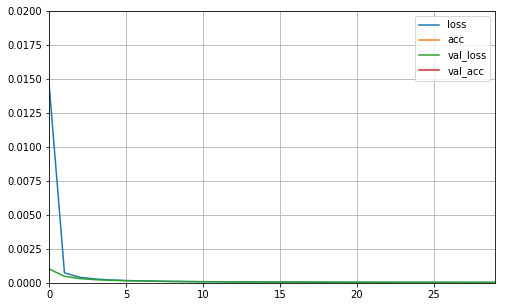

In [47]:
pd.DataFrame(successrate).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 0.02)
plt.show()

In [51]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 36us/sample - loss: 14.5063 - acc: 0.1000


[14.506285690307617, 0.1]

In [30]:
model.layers[1].get_weights()

[array([[ 0.00460728, -0.03529599,  0.01799229, ..., -0.01557646,
         -0.00537702, -0.06089414],
        [-0.0038128 , -0.06928042,  0.02414784, ..., -0.06206581,
          0.03295456, -0.02978659],
        [-0.07065691,  0.07205057,  0.02772684, ...,  0.07123269,
         -0.04214498,  0.06154501],
        ...,
        [-0.04796335,  0.06178303, -0.01173612, ..., -0.07437917,
          0.05160931, -0.04549995],
        [-0.02803079, -0.01483152,  0.04796949, ..., -0.02350477,
          0.0093462 , -0.03958866],
        [ 0.05824816,  0.04073764, -0.03488019, ..., -0.02071735,
         -0.02935489,  0.01714293]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

## 10x10 Visualization

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


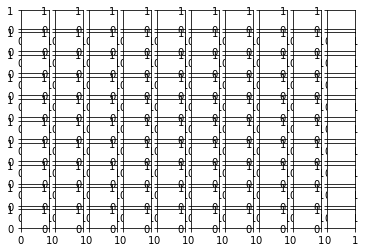

In [16]:
fig, axes = plt.subplots(nrows=10, ncols=10)
plt.tight_layout()
plt.show()

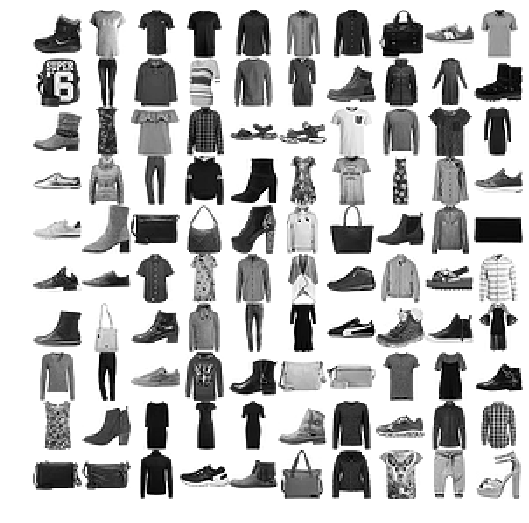

In [12]:
# Plotting a bunch of cases
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
plt.figure(figsize=(9,9))
X = X_train_full
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
# save_fig("more_digits_plot")
plt.show()

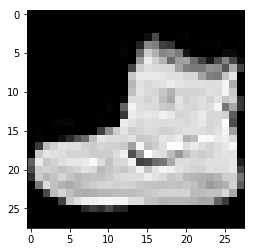

In [15]:
axes[0] = plt.imshow(X_train_full[0], cmap = 'gray')